In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2014, 2017)

dataSetOps.prepare()
dataSetOps.prepare2()

df = dataSetOps.df

In [4]:
df.head()

,date,open,max,min,close,price,diff,value_d,mavg10,mavg20,...,val_past_60,val_past_61,val_past_62,val_past_63,has_down_v,has_up_v,has_down,has_up,has_not_up,value_nr
999,20140102 100700,1.36572,1.36584,1.36554,1.36554,1.36554,-0.00003,-0.3,6.71,6.695,...,-1.2,-1.8,0.5,3.2,NaN,NaN,False,False,False,False
1000,20140102 100800,1.36550,1.36555,1.36522,1.36555,1.36555,-0.00020,-2.0,6.11,6.430,...,-0.8,-1.2,-1.8,0.5,NaN,NaN,False,False,False,False
1001,20140102 100900,1.36554,1.36556,1.36532,1.36535,1.36535,0.00001,0.1,3.27,4.055,...,1.9,-0.8,-1.2,-1.8,NaN,NaN,False,False,False,False
1002,20140102 101000,1.36536,1.36575,1.36524,1.36575,1.36575,-0.00020,-2.0,5.41,7.500,...,3.1,1.9,-0.8,-1.2,NaN,NaN,False,False,False,False
1003,20140102 101100,1.36576,1.36576,1.36525,1.36532,1.36532,0.00040,4.0,-0.05,3.025,...,1.3,3.1,1.9,-0.8,NaN,NaN,False,False,False,False


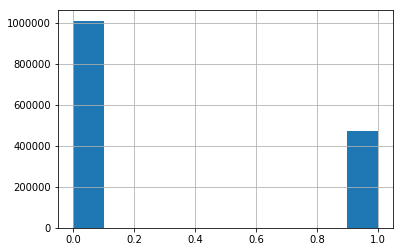

In [5]:
df.value_nr.astype(int).hist()

In [6]:
X = df[['value_d', 'mavg10', 'mavg20', 'mavg100', 'mavg1000']]
Y = df['value_nr']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 5))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae]
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=64, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel

Epoch 1/100
1185442/1185442 [==============================] - 59s 50us/step - loss: 0.2130 - mean_absolute_error: 0.4257
Epoch 2/100
1185442/1185442 [==============================] - 59s 50us/step - loss: 0.2124 - mean_absolute_error: 0.4246
Epoch 3/100
1185442/1185442 [==============================] - 59s 50us/step - loss: 0.2123 - mean_absolute_error: 0.4244
Epoch 4/100
1185442/1185442 [==============================] - 59s 50us/step - loss: 0.2122 - mean_absolute_error: 0.4243
Epoch 5/100
1185442/1185442 [==============================] - 59s 50us/step - loss: 0.2122 - mean_absolute_error: 0.4242
Epoch 6/100
1185442/1185442 [==============================] - 60s 50us/step - loss: 0.2122 - mean_absolute_error: 0.4242
Epoch 7/100
1185442/1185442 [==============================] - 61s 51us/step - loss: 0.2122 - mean_absolute_error: 0.4242
Epoch 8/100
1185442/1185442 [==============================] - 62s 52us/step - loss: 0.2122 - mean_absolute_error: 0.4243
Epoch 9/100
1185442/1185

KeyboardInterrupt: 

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.3)

In [ ]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
from lib.helper import AccuracyCalculator

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(classifier.predict(X_test)[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(classifier.predict(X_test)[:,0], y_test)

In [ ]:
risk_hist_df.risk.plot()